In [164]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

#warnings
import warnings
warnings.filterwarnings('ignore')

In [165]:
def split_data(data):
    #define X, y
    X = data.drop(['label'], axis=1).values
    y = data['label'].values
    #split into train and test to avoid overfitting
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)
    return X_train, X_test, y_train, y_test

In [166]:
def lr_model(X_train, y_train):
    '''
    logistic regression model
    input: X_train, y_train
    output: logistic regression model
    '''
    lr = LogisticRegression(C=0.01)
    lr.fit(X_train, y_train)
    return lr

In [167]:
def report(y_test, y_pred):
    print(classification_report(y_test, y_pred))

In [168]:
def plot_confusion_matrix(y_test, y_pred,normalize=False):
    '''
    plot confusion matrix
    input: y_test,y_pred
    output: confusion matrix plot
    '''
    cnf_matrix=metrics.confusion_matrix(y_test,y_pred)
    if normalize:
        cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('lr confusion matrix', y=1.1)
    #plt.ylabel('Actual label')
    #plt.xlabel('Predicted label')
    plt.show()
    plt.savefig('lr_confusion_matrix.png')  

In [169]:
def plot_roc_auc(X_test,y_test, y_pred):
    logit_roc_auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    #plt.xlabel("False Positive Rate")
    #plt.ylabel("True Positive Rate")
    plt.title('LR Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Lr_ROC.png')
    plt.show()

In [170]:
def grid_search(param,X_train, y_train):
    '''
    grid search for random forest
    with 5-fold cross validation
    '''
    lr_model = GridSearchCV(estimator=LogisticRegression(),
                            param_grid = param, 
                            scoring='roc_auc',
                            cv=5)
    lr_model.fit(X_train, y_train)
    print(lr_model.best_params_)
    print(lr_model.best_score_)  
    return lr_model

              precision    recall  f1-score   support

           0       0.75      0.77      0.76     99362
           1       0.77      0.74      0.76     99719

   micro avg       0.76      0.76      0.76    199081
   macro avg       0.76      0.76      0.76    199081
weighted avg       0.76      0.76      0.76    199081



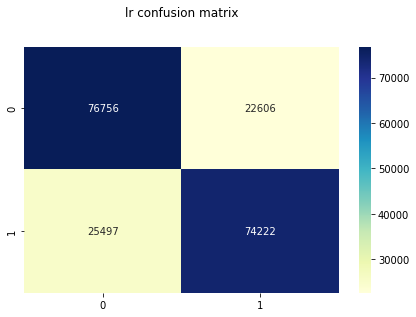

<Figure size 432x288 with 0 Axes>

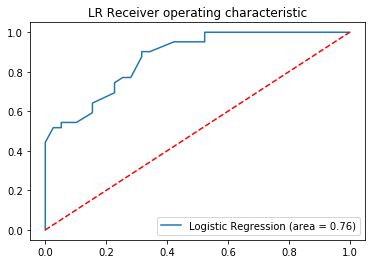

In [171]:
if __name__ == '__main__':
    data=pd.read_csv('./data/data_final.csv', index_col =0)
    X_train, X_test, y_train, y_test = split_data(data)
    #param = {'penalty':['l1','l2'],'C':[0.1,1,10]}
    #grid_lr = grid_search(param,X_train, y_train)
    lr = lr_model(X_train, y_train)
    y_pred = lr.predict(X_test)
    report(y_test, y_pred)
    plot_confusion_matrix(y_test, y_pred,normalize=False)
    plot_roc_auc(X_test,y_test, y_pred)